In [2]:
import numpy as np
import math

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import time

Q1
Params(k,m)=784 * m + m + (k - 1) * (m^2 + m) + m * 10 + 10 = （794+k）* m + （k-1）* m^2 + 10

In [ ]:
def params(k, m):
    """
    Calculates the total number of parameters for a neural network architecture on the MNIST dataset,
    given k hidden layers and m nodes per hidden layer.

    Args:
    - k: Number of hidden layers in the network (k >= 1)
    - m: Number of nodes in each hidden layer

    Returns:
    - The total number of parameters in the network
    """

    # Number of parameters between input layer and first hidden layer
    input_to_hidden = 784 * m + m  # 784 input nodes, m nodes in the hidden layer, +m for biases in the hidden layer

    # Number of parameters between each hidden layer (for k-1 hidden layers, since the first calculation is above)
    hidden_to_hidden = (k - 1) * (m * m + m)  # m nodes in each hidden layer, +m for biases in each hidden layer

    # Number of parameters between last hidden layer and output layer
    hidden_to_output = m * 10 + 10  # m nodes in the last hidden layer, 10 output nodes, +10 for biases in the output layer

    # Total number of parameters
    total_params = input_to_hidden + hidden_to_hidden + hidden_to_output

    return total_params




In [ ]:
# Test the function with an example
k_example = 2  # Example with 2 hidden layers
m_example = 64  # Example with 64 nodes per hidden layer

# Calculate total parameters
total_params_example = params(k_example, m_example)
total_params_example

55050

For Problem 2, you are looking to solve for
k in the equation Params(k,m)=P to find the smallest and largest values of k (denoted as k P) such that the total number of parameters in the network equals a given number P. This problem involves rearranging the previously derived equation to solve for k.

Given:
Params(k,m)=785m+(k−1)(m^2+m)+10m+10=P

We can simplify and solve this equation for k:
785m+m^2*(k−1)+m(k−1)+10m+10=P
−1)+m(k−1)+795m+10=P

This equation now expresses
�
k in terms of
�
P and
�
m, allowing you to find the value of
�
k for a specific total number of parameters
�
P and a chosen number of nodes per hidden layer
�
m.

When
�
�
k
P
​
  is not an integer:
Rounding: Since
�
k represents the number of hidden layers in a neural network, and you cannot have a fraction of a layer, you would typically round
�
�
k
P
​
  to the nearest whole number. However, in a practical scenario, you might consider rounding down to ensure you don't exceed the desired parameter count, or rounding up if slightly exceeding the parameter count is acceptable given the context.

Interpretation: If rounding down, you are opting for a simpler model (potentially underfitting), and rounding up means a slightly more complex model (potentially overfitting). The choice depends on additional constraints such as computational resources and the need for model interpretability.

Finding Smallest and Largest Values of k:
To find the smallest and largest values of k that meet the condition
Params(k,m)=P, you would vary m within reasonable bounds given the structure of neural networks and the nature of the MNIST dataset. The equation provides a direct method to compute k for any given P and m, but exploring the entire space of m values might require additional constraints based on the specific problem or computational limitations.

P3

In [ ]:
def find_k_range(P):
   k_min = 922337203685477580
   k_max = 1
   for m in range(round(P/794)):
      k= (P - 10 + (m+1)**2- 794 * (m+1))/((m+1)**2 + (m+1))
      if k > k_max:
         k_max=k
      if k < k_min and k >= 1:
         k_min=k
   k_max=math.floor(k_max)
   k_min=math.ceil(k_min)

   return k_min, k_max

In [ ]:
def solve_for_m(P, k):
    # Placeholder for solving for m given P and k
    # This requires a numerical method or iterative approach to find m that satisfies Params(k, m) ≈ P
    # For demonstration purposes, let's assume a simple approximation
    m = round((-794 - k + math.sqrt( (794+k)**2 - 4 * (k-1) * ( -P + 10) ) ) / (2 * (k-1)))  # P= （794+k）* m + （k-1）* m^2 + 10

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import time

# Assume params function and find_k_range from previous discussion are defined

# Load MNIST data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)


def create_network(k, m):
    layers = [nn.Flatten()]
    if k > 0:
        # First hidden layer
        layers.append(nn.Linear(784, m))
        layers.append(nn.ReLU())
        # Additional hidden layers
        for _ in range(1, k):
            layers.append(nn.Linear(m, m))
            layers.append(nn.ReLU())
    # For k=0, no hidden layers are added, proceed directly to output layer

    # Output layer
    # When k>0, 'm' is the size of hidden layers; when k=0, directly use 784 as input size to the output layer
    out_features = m if k > 0 else 784  # Adjusted to directly handle k=0 scenario
    layers.append(nn.Linear(out_features, 10))
    layers.append(nn.LogSoftmax(dim=1))

    return nn.Sequential(*layers)
'''def create_network(k, m):
    layers = [nn.Flatten()]
    if k == 0:  # No hidden layers, directly connect input to output
        layers.append(nn.Linear(784, 10))  # MNIST images are 28x28 = 784 in size
    else:
        # First layer
        layers.append(nn.Linear(784, m))  # First layer must match input size
        layers.append(nn.ReLU())
        # Additional hidden layers (if k > 1)
        for _ in range(1, k):  # Already added the first hidden layer
            layers.append(nn.Linear(m, m))  # Hidden layers
            layers.append(nn.ReLU())
        # Output layer
        layers.append(nn.Linear(m, 10))  # Final layer to 10 outputs for MNIST digits
    layers.append(nn.LogSoftmax(dim=1))
    return nn.Sequential(*layers)'''
def solve_for_m(P, k):
    # Placeholder for solving for m given P and k
    # This requires a numerical method or iterative approach to find m that satisfies Params(k, m) ≈ P
    # For demonstration purposes, let's assume a simple approximation
    m = round((-794 - k + math.sqrt( (794+k)**2 - 4 * (k-1) * ( -P + 10) ) ) / (2 * (k-1)))  # P= （794+k）* m + （k-1）* m^2 + 10

    return max(m, 1)  # Ensure m is at least 1

def train_and_evaluate(model, train_loader, test_loader, epochs=10):
    criterion = nn.NLLLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Lists to store average losses per epoch
    epoch_train_losses = []
    epoch_test_losses = []
    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        avg_train_loss = total_train_loss / len(train_loader)
        epoch_train_losses.append(avg_train_loss)

        model.eval()
        total_test_loss = 0
        with torch.no_grad():
            for images, labels in test_loader:
                output = model(images)
                loss = criterion(output, labels)
                total_test_loss += loss.item()
        avg_test_loss = total_test_loss / len(test_loader)
        epoch_test_losses.append(avg_test_loss)

    training_time = time.time() - start_time
    return epoch_train_losses, epoch_test_losses, training_time
"""def train_and_evaluate(model, train_loader, test_loader, epochs=10):
    # Initialize loss function and optimizer
    criterion = nn.NLLLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Lists to store losses for analysis (if needed)
    train_losses = []
    test_losses = []

    # Measure training time
    start_time = time.time()

    for epoch in range(epochs):
        model.train()  # Set model to training mode
        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())

        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            test_loss = 0
            correct = 0
            for images, labels in test_loader:
                output = model(images)
                test_loss += criterion(output, labels).item()
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(labels.view_as(pred)).sum().item()

        test_losses.append(test_loss / len(test_loader))

    training_time = time.time() - start_time

    # Optionally, return the average of the recorded losses
    avg_train_loss = sum(train_losses) / len(train_losses)
    avg_test_loss = sum(test_losses) / len(test_losses)
    accuracy = correct / len(test_loader.dataset)

    print(f"Epoch {epoch+1}/{epochs}: Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Accuracy: {accuracy:.4f}")

    return avg_train_loss, avg_test_loss, training_time"""
# Verify data loading
print("Training set size:", len(train_dataset))
print("Test set size:", len(test_dataset))
# Main experiment loop
P_values = [1000000]##, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000] # Example P values
results = []
# Example: A network with 2 hidden layers and 64 nodes each
"""model = create_network(2, 64)
train_loss, test_loss, training_time = train_and_evaluate(model, train_loader, test_loader, epochs=1)
print(f"Train Loss: {train_loss[-1]}, Test Loss: {test_loss[-1]}, Training Time: {training_time}")
print(model)"""
# Test train_and_evaluate function
"""test_model = create_network(1, 10)  # Example: 1 layer, 10 nodes
train_loss, test_loss, training_time = train_and_evaluate(test_model, train_loader, test_loader, epochs=1)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}, Training Time: {training_time}")"""

for P in P_values:
    k_min, k_max = find_k_range(P)
    kP = k_max # Assuming k_max is the max value of k for the given P
    print(f"P: {P}, k_min: {k_min}, k_max: {k_max}")
    for k in range(k_min, 11 ):
        print(k)

        m = solve_for_m(P, k)
        print(m) # Ensure this function returns valid 'm' values
        print(params(k, m))
        model = create_network(k, m)
        print(model)
        train_loss, test_loss, training_time = train_and_evaluate(model, train_loader, test_loader, epochs=10)
        print(f"Data from train_and_evaluate: {train_loss}, {test_loss}, {training_time}")
        results.append((P, k, np.mean(train_loss), np.mean(test_loss), training_time))  # Use mean of losses if they're lists

           ## print("Appending test data to results")
            ##results.append(('test', 0, 0, 0, 0))  # This is just for debugging



# Check if anything was appended
print(f"Results contains {len(results)} entries.")

Training set size: 60000
Test set size: 10000
P: 1000000, k_min: 2, k_max: 499598
2
678
999382
Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=678, bias=True)
  (2): ReLU()
  (3): Linear(in_features=678, out_features=678, bias=True)
  (4): ReLU()
  (5): Linear(in_features=678, out_features=10, bias=True)
  (6): LogSoftmax(dim=1)
)
Data from train_and_evaluate: [0.8642620118632753, 0.35222879006092483, 0.2997619530269459, 0.2671702507891253, 0.23997804092795355, 0.21691418525331946, 0.19558877905787053, 0.17775130410120685, 0.16221415076746362, 0.14870037730814997], [0.3831161126494408, 0.3047901540994644, 0.2774157181382179, 0.2524784468114376, 0.21995911970734597, 0.209801983833313, 0.18898636922240258, 0.1726219803094864, 0.15633424930274487, 0.14429079964756966], 64.81939601898193
3
535
998855
Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=535, bias=True)
  (2): ReLU()
  (3): Linear(in_f

In [ ]:
print(results[:5])

[(1000000, 2, 0.294199867915513, 0.2326135916262865, 108.64927124977112), (1000000, 3, 0.331953143546465, 0.24092553563416003, 123.68885707855225), (1000000, 4, 0.4077704402095855, 0.3081915549188852, 118.88506817817688), (1000000, 5, 0.5680402545751864, 0.4783746624365448, 129.4966995716095), (1000000, 6, 0.9123130698158131, 0.8048967920988798, 137.2296485900879)]


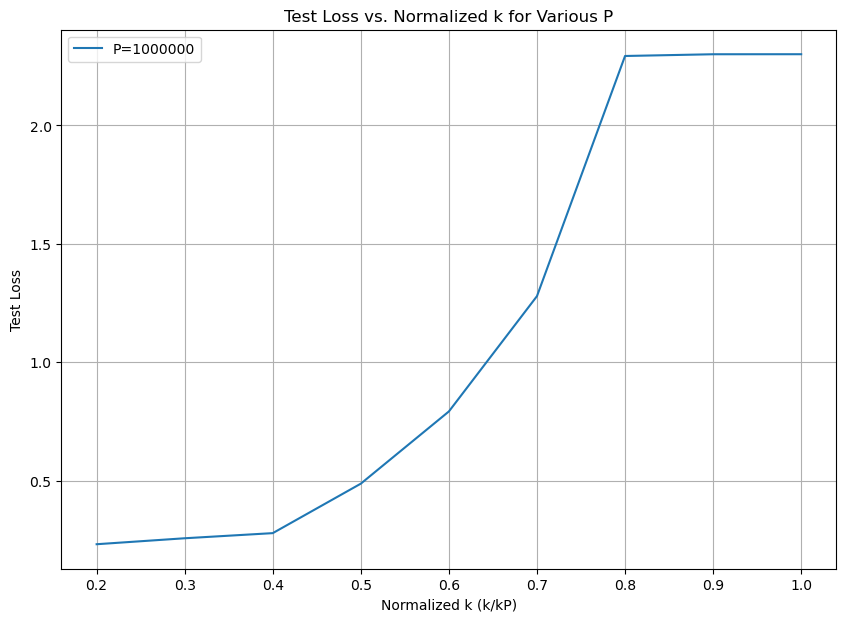

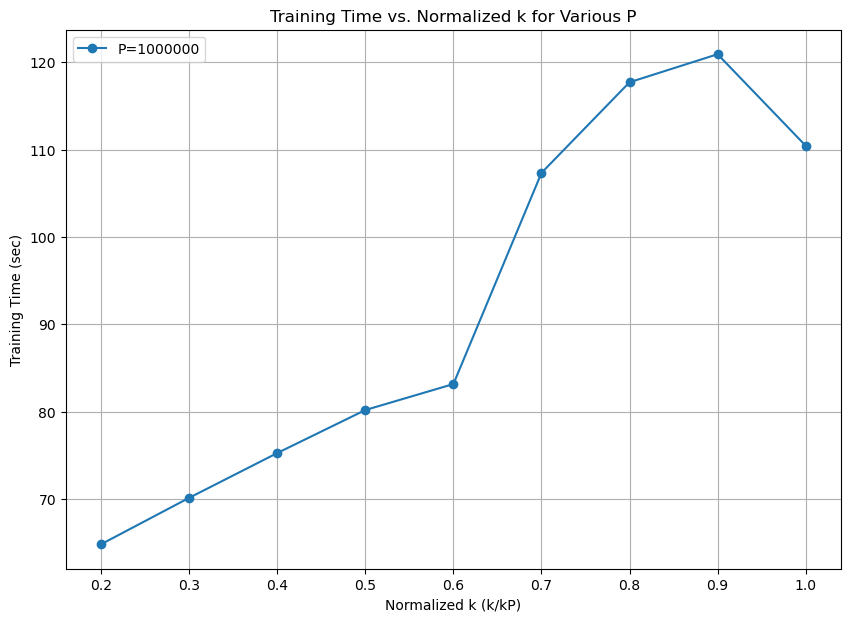

In [ ]:
# Assuming 'results' is a list of tuples: (P, k, train_loss, test_loss, training_time)
# Ensure results are sorted by P then by k for consistency in plotting
results = sorted(results, key=lambda x: (x[0], x[1]))

# Extract unique P values to plot different curves for each
P_values = sorted(set([result[0] for result in results]))

# Plot Test Loss against normalized k values
plt.figure(figsize=(10, 7))
for P in P_values:
    # Filter results for the current P value
    filtered_results = [result for result in results if result[0] == P]
    # Extract k values and find the maximum k value (kP) for normalization
    k_values = [result[1] for result in filtered_results]
    kP = max(k_values)
    # Normalize k values for plotting
    normalized_k_values = [k / kP for k in k_values]
    # Extract test loss values
    test_losses = [result[3] for result in filtered_results]
    # Plot normalized k vs test loss for the current P
    plt.plot(normalized_k_values, test_losses, label=f'P={P}')

# Set labels, title, and show the plot with a legend and grid
plt.xlabel('Normalized k (k/kP)')
plt.ylabel('Test Loss')
plt.title('Test Loss vs. Normalized k for Various P')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training Time against normalized k values
plt.figure(figsize=(10, 7))
for P in P_values:
    # Repeat the process for training times
    filtered_results = [result for result in results if result[0] == P]
    k_values = [result[1] for result in filtered_results]
    kP = max(k_values)
    normalized_k_values = [k / kP for k in k_values]
    training_times = [result[4] for result in filtered_results]
    # Plot normalized k vs training time for the current P, using markers for each data point
    plt.plot(normalized_k_values, training_times, label=f'P={P}', marker='o')

# Set labels, title, and show the plot with a legend and grid
plt.xlabel('Normalized k (k/kP)')
plt.ylabel('Training Time (sec)')
plt.title('Training Time vs. Normalized k for Various P')
plt.legend()
plt.grid(True)
plt.show()

Test Loss vs. Normalized k
The first plot shows test loss increasing as the number of layers increases, with a particularly sharp rise after thek/kP
​
  value exceeds approximately 0.8. This trend suggests that the network's performance worsens as the model becomes deeper past a certain point. It's interesting to note that:

Initial Decrease: Initially, as the depth increases, the test loss decreases, indicating that additional layers are helping the model capture more complex features and patterns.
Sharp Increase: After a certain depth, the increase in test loss indicates that the model might be overfitting, or the network becomes too deep to train effectively, which is a common issue when layers become too numerous or too narrow.
If we compare this to a linear softmax model (our baseline), which is essentially a single-layer network with no hidden layers (k=0), the following can be inferred:

Compared to Baseline: Initially, the deeper networks perform better than the baseline, as they can capture more complex features. However, the sharp increase in test loss after a certain depth suggests that beyond this point, the more complex model is no longer generalizing well and is outperformed by the simpler baseline model.
Training Time vs. Normalized k
The second plot shows training time as a function of normalized k. We observe that:

Variable Increase: The training time generally increases with the number of layers, which is expected as more computations are required for additional layers. There are some fluctuations, which might be due to the specific configurations of the layers, variations in convergence speed, or the efficiency of computations at different depths.

Peak Before kP: There's a peak in training time before reaching
kP, after which the training time slightly decreases. This could be due to a variety of factors, including potential hardware optimizations or bottlenecks that may affect the training of very deep networks.

Sweet Spot for Network Shape
From the plots, it seems there's an optimal range for the normalized k value before the test loss begins to rise sharply (k=7). This could be considered the sweet spot for the number of layers in the network given P=1,000,000.

Too Narrow Layers: The point at which the test loss begins to increase sharply could be indicative of layers becoming too narrow to be useful. The network may have enough capacity (total parameters P) but is not utilizing it effectively due to the constraints of the chosen architecture.

Dependency on P: The sweet spot likely depends on the value of P. For different values of P, the trade-off between depth and width would need to be recalibrated. A larger P might allow for a deeper or wider network before overfitting occurs, while a smaller P would reach the overfitting threshold sooner.
Conclusion

In conclusion, the given plots illustrate the complexity of finding the optimal network architecture. While deeper networks can offer better performance up to a point, there's a threshold beyond which additional depth can harm the network's ability to generalize, leading to increased test loss. The training time also increases with depth, though not always linearly, which is an important consideration for the practical deployment of these models. For the given P, the network's sweet spot appears to be at a depth where the test loss is minimized before it begins to increase sharply. This spot is where the network is likely deep enough to capture the necessary complexity of the data but not so deep that it begins to overfit or becomes inefficient to train.








P4

In [ ]:
def train_and_evaluate(model, train_loader, test_loader, epochs=10):
    criterion = nn.NLLLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Train the model
    model.train()
    for epoch in range(epochs):
        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

    # Evaluate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate test accuracy
    test_accuracy = 100 * correct / total
    return test_accuracy

# Assuming everything else is defined as before, including the data loaders and create_network function

# Train and evaluate models


In [ ]:

def create_network(layer_sizes):
    layers = [nn.Flatten()]
    input_size = 784  # Input layer size for MNIST
    for i, size in enumerate(layer_sizes):
        layers.append(nn.Linear(input_size, size))
        layers.append(nn.ReLU())
        input_size = size  # Update input size for the next layer
    layers.append(nn.Linear(input_size, 10))  # Output layer
    layers.append(nn.LogSoftmax(dim=1))
    return nn.Sequential(*layers)

# Calculate base number of nodes for the uniform configuration
P = 1000000
k = 7  # Chosen number of hidden layers
m_uniform = solve_for_m(P, k)

# Generate layer sizes for each configuration
uniform_sizes = [m_uniform] * k
increasing_sizes = [m_uniform + i*(m_uniform//k) for i in range(k)]
decreasing_sizes = [m_uniform + (k-i-1)*(m_uniform//k) for i in range(k)]

# Load data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Train and evaluate models
model_accuracies = {}
for name, sizes in {"Uniform": uniform_sizes, "Increasing": increasing_sizes, "Decreasing": decreasing_sizes}.items():
    model = create_network(sizes)
    accuracy = train_and_evaluate(model, train_loader, test_loader, epochs=10)
    model_accuracies[name] = accuracy

# Print comparison based on testing accuracy
for configuration, accuracy in model_accuracies.items():
    print(f"{configuration} configuration test accuracy: {accuracy:.2f}%")

Uniform configuration test accuracy: 93.86%
Increasing configuration test accuracy: 94.60%
Decreasing configuration test accuracy: 94.14%


P5

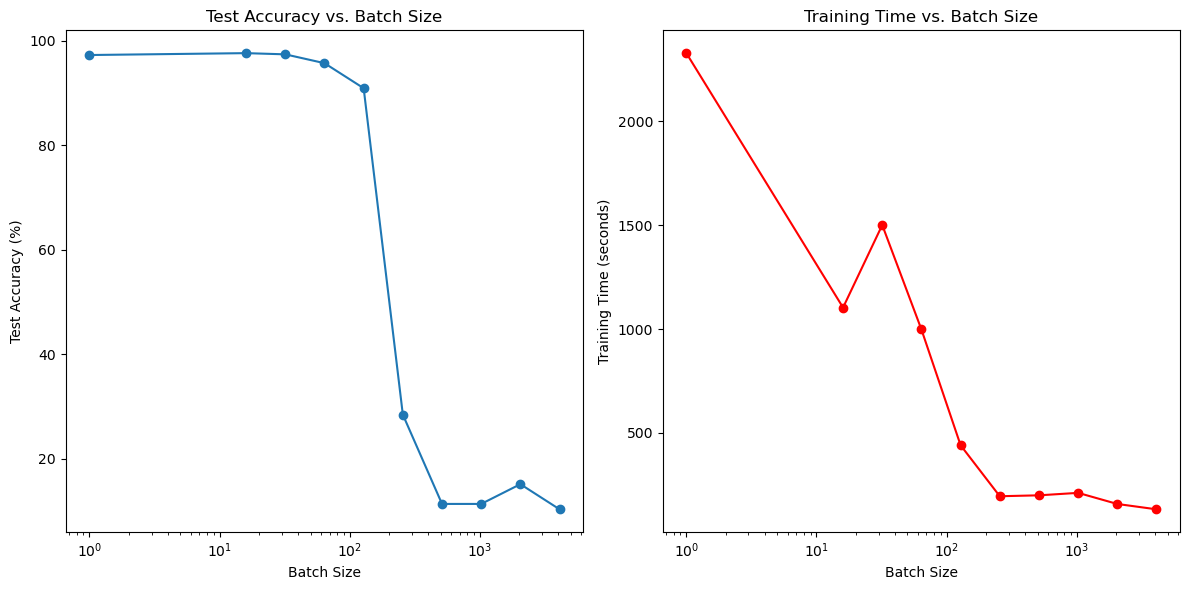

In [ ]:
import matplotlib.pyplot as plt
import time
import numpy as np
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

# Assuming definitions for 'solve_for_m', 'params', and the DataLoader setup are available
# Redefine the increasing model based on the best structure from Problem 4
def create_increasing_model(increasing_sizes):
    layers = [nn.Flatten()]
    input_size = 784  # MNIST images are 28x28 pixels
    for i, size in enumerate(increasing_sizes[:-1]):
        layers.append(nn.Linear(input_size, size))
        layers.append(nn.ReLU())
        input_size = size
    # Add the final layer
    layers.append(nn.Linear(input_size, 10))  # 10 classes for MNIST
    layers.append(nn.LogSoftmax(dim=1))
    return nn.Sequential(*layers)

# Experiment with ten batch sizes
batch_sizes = [1, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
epochs = 10
P = 1000000  # Total number of parameters as chosen in Problem 4
k = 7  # Assuming 7 layers based on the previous discussion

# Calculate sizes for the increasing model
m_base = solve_for_m(P, k)
increasing_sizes = [m_base + i*20 for i in range(k)]  # Example increasing sizes

# Data loading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Function to train and evaluate the model
def train_and_evaluate(model, train_loader, test_loader, epochs):
    criterion = nn.NLLLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    model.train()
    for epoch in range(epochs):
        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Record results
results = []
for batch_size in batch_sizes:
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    model = create_increasing_model(increasing_sizes)
    start_time = time.time()
    accuracy = train_and_evaluate(model, train_loader, test_loader, epochs)
    end_time = time.time()
    training_time = end_time - start_time
    results.append((batch_size, accuracy, training_time))

# Plotting
batch_sizes, accuracies, training_times = zip(*results)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, accuracies, marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Test Accuracy (%)')
plt.xscale('log')
plt.title('Test Accuracy vs. Batch Size')

plt.subplot(1, 2, 2)
plt.plot(batch_sizes, training_times, marker='o', color='red')
plt.xlabel('Batch Size')
plt.ylabel('Training Time (seconds)')
plt.xscale('log')
plt.title('Training Time vs. Batch Size')
plt.tight_layout()
plt.show()

P6

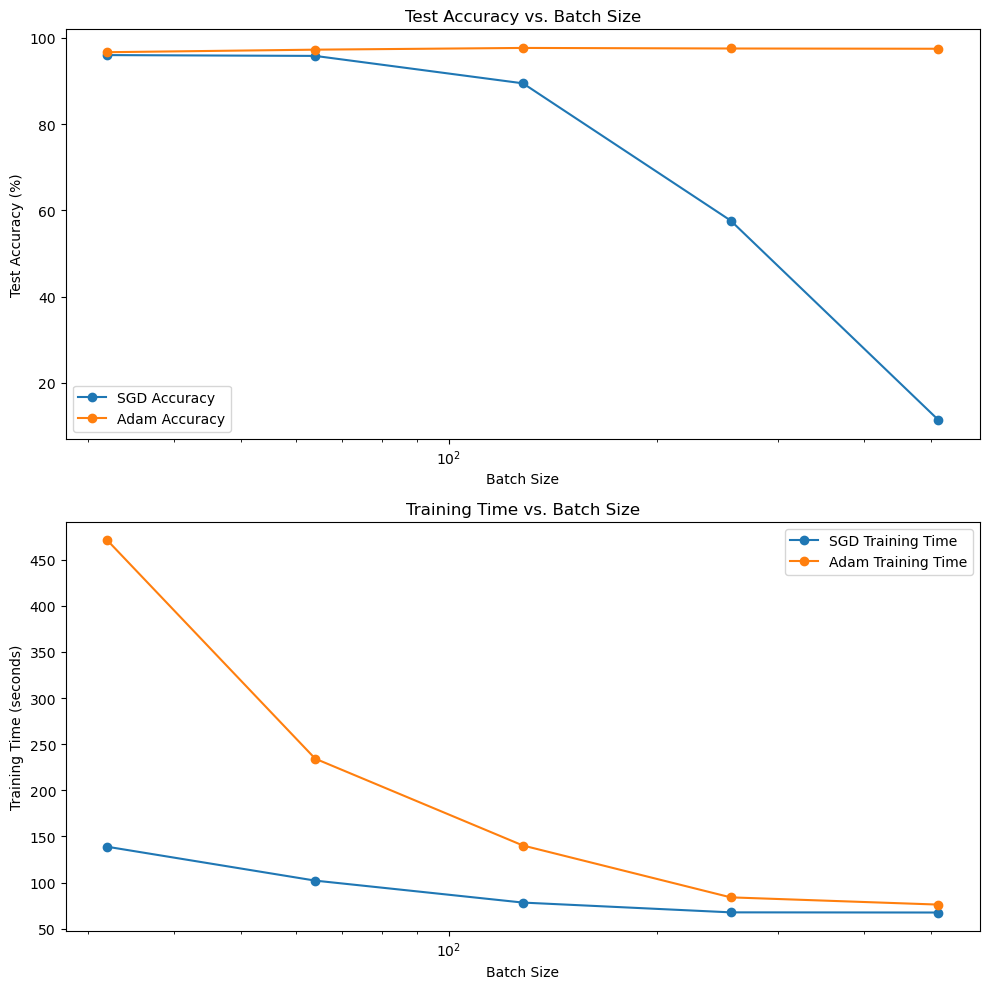

In [ ]:
def train_and_evaluate_with_optimizer(model, train_loader, test_loader, epochs, optimizer_fn):
    criterion = nn.NLLLoss()
    optimizer = optimizer_fn(model.parameters())
    model.train()

    for epoch in range(epochs):
        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

increasing_sizes = [m_base] + [int(m_base * (1 + i * 0.1)) for i in range(1, k)]  # For example

def compare_optimizers(train_dataset, test_dataset, increasing_sizes, epochs=10, batch_sizes=[32, 64, 128, 256, 512]):
    results = {}

    for optimizer_name, optimizer_fn in [('SGD', lambda params: optim.SGD(params, lr=0.01)),
                                         ('Adam', lambda params: optim.Adam(params, lr=0.001))]:
        results[optimizer_name] = []
        for batch_size in batch_sizes:
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
            model = create_increasing_model(increasing_sizes)  # Call with the increasing_sizes argument
            start_time = time.time()
            accuracy = train_and_evaluate_with_optimizer(model, train_loader, test_loader, epochs, optimizer_fn)
            end_time = time.time()
            results[optimizer_name].append((batch_size, accuracy, end_time - start_time))

    return results

# Now call the compare_optimizers function with the increasing_sizes
results = compare_optimizers(train_dataset, test_dataset, increasing_sizes, epochs=10, batch_sizes=[32, 64, 128, 256, 512])
# Plotting the results for comparison
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

for optimizer_name in results:
    batch_sizes, accuracies, training_times = zip(*results[optimizer_name])
    axs[0].plot(batch_sizes, accuracies, marker='o', label=f'{optimizer_name} Accuracy')
    axs[1].plot(batch_sizes, training_times, marker='o', label=f'{optimizer_name} Training Time')

axs[0].set_xlabel('Batch Size')
axs[0].set_ylabel('Test Accuracy (%)')
axs[0].set_xscale('log')
axs[0].set_title('Test Accuracy vs. Batch Size')
axs[0].legend()

axs[1].set_xlabel('Batch Size')
axs[1].set_ylabel('Training Time (seconds)')
axs[1].set_xscale('log')
axs[1].set_title('Training Time vs. Batch Size')
axs[1].legend()

plt.tight_layout()
plt.show()

P7

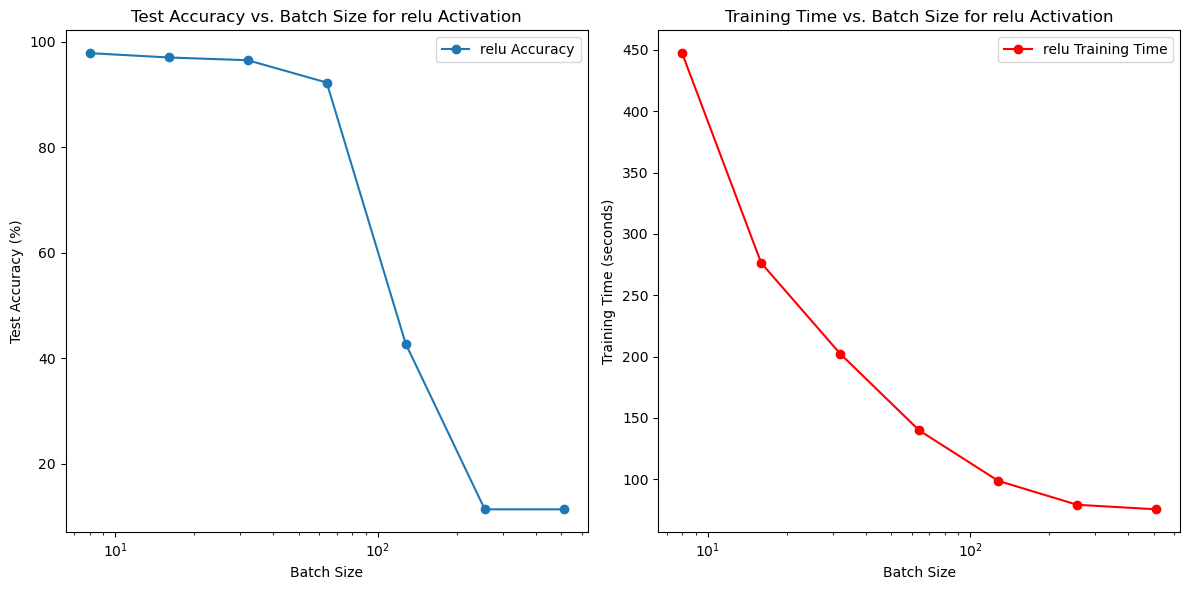

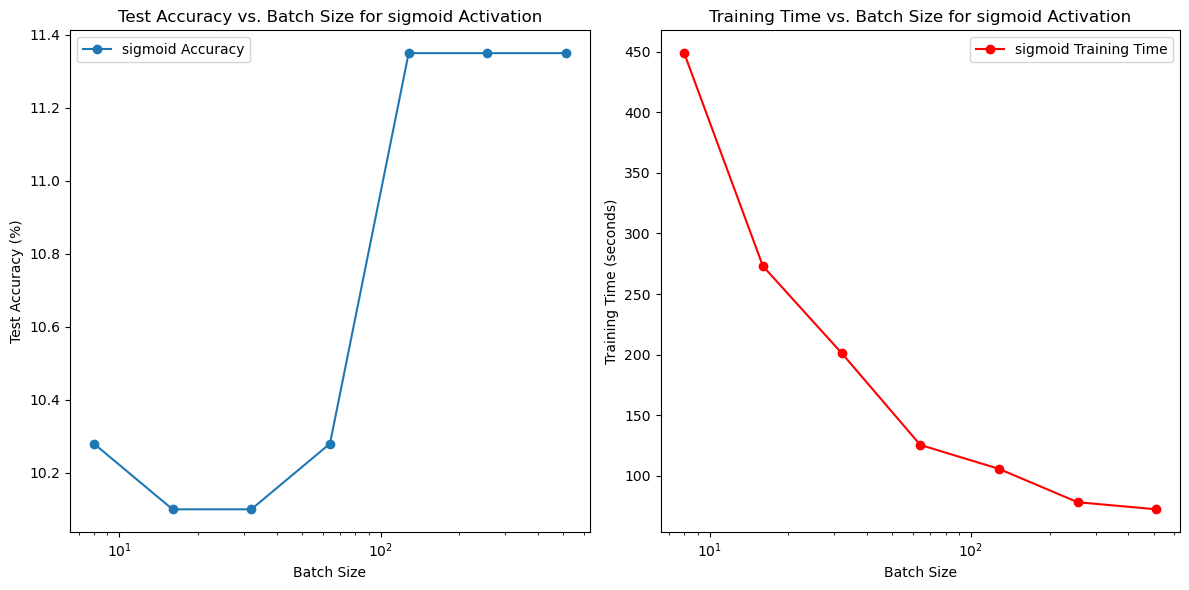

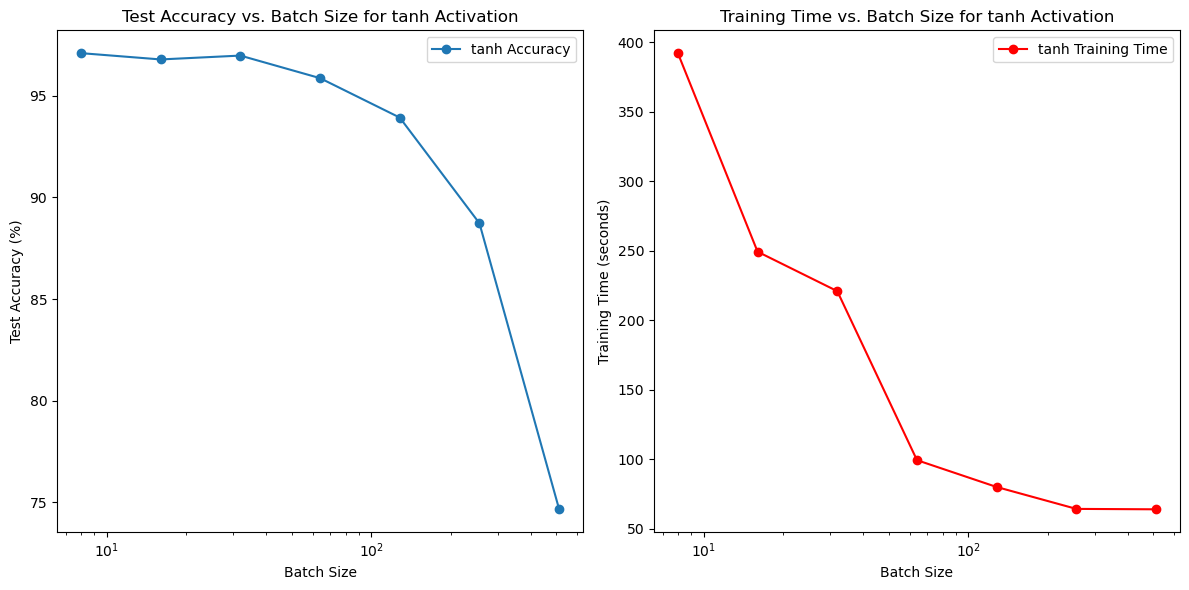

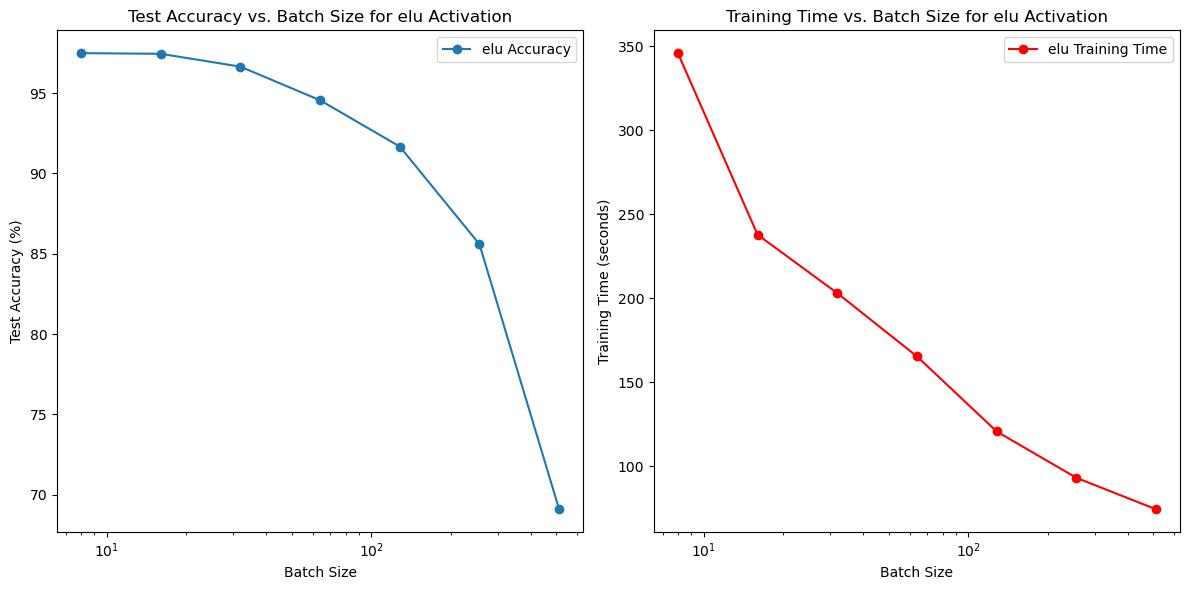

In [ ]:
import matplotlib.pyplot as plt
import time
import numpy as np
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

# Defines how to create a model with an increasing number of nodes and a specific activation function
def create_increasing_model_with_activation(increasing_sizes, activation_fn):
    layers = [nn.Flatten()]
    input_size = 784  # MNIST images are 28x28 pixels
    for size in increasing_sizes:
        layers.append(nn.Linear(input_size, size))
        if activation_fn == 'relu':
            layers.append(nn.ReLU())
        elif activation_fn == 'sigmoid':
            layers.append(nn.Sigmoid())
        elif activation_fn == 'tanh':
            layers.append(nn.Tanh())
        elif activation_fn == 'elu':
            layers.append(nn.ELU())
        input_size = size
    layers.append(nn.Linear(input_size, 10))  # Output layer for 10 classes
    layers.append(nn.LogSoftmax(dim=1))
    return nn.Sequential(*layers)

# Assuming 'solve_for_m' and 'train_and_evaluate' are defined as per the previous problems
P = 1000000
k = 7
m_base = solve_for_m(P, k)  # Get the base size for the first hidden layer
increasing_sizes = [m_base + i*20 for i in range(k)]  # Calculate increasing sizes for each layer

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Different batch sizes to experiment with
batch_sizes = [8,16, 32, 64, 128, 256, 512]

# Activation functions to experiment with
activation_functions = ['relu', 'sigmoid', 'tanh', 'elu']

# Run experiments for each activation function
for activation_fn in activation_functions:
    results = []
    for batch_size in batch_sizes:
        # Create data loaders
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        # Create model with the specified activation function
        model = create_increasing_model_with_activation(increasing_sizes, activation_fn)

        # Train and evaluate the model
        start_time = time.time()
        accuracy = train_and_evaluate(model, train_loader, test_loader, epochs=10)
        end_time = time.time()

        # Record the accuracy and training time
        results.append((batch_size, accuracy, end_time - start_time))

    # Plotting the results
    batch_sizes, accuracies, training_times = zip(*results)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(batch_sizes, accuracies, marker='o', label=f'{activation_fn} Accuracy')
    plt.xlabel('Batch Size')
    plt.ylabel('Test Accuracy (%)')
    plt.xscale('log')
    plt.title(f'Test Accuracy vs. Batch Size for {activation_fn} Activation')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(batch_sizes, training_times, marker='o', color='red', label=f'{activation_fn} Training Time')
    plt.xlabel('Batch Size')
    plt.ylabel('Training Time (seconds)')
    plt.xscale('log')
    plt.title(f'Training Time vs. Batch Size for {activation_fn} Activation')
    plt.legend()
    plt.tight_layout()
    plt.show()

P8

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Load data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, conv_out_channels, kernel_size, dense_layer_size):
        super(SimpleCNN, self).__init__()
        # Convolutional layer parameters
        self.conv1 = nn.Conv2d(1, conv_out_channels, kernel_size=kernel_size)
        self.conv_output_size = self.calculate_conv_output_size(28, 28, kernel_size)

        # Dense layers parameters
        self.fc1 = nn.Linear(conv_out_channels * self.conv_output_size * self.conv_output_size, dense_layer_size)
        self.fc2 = nn.Linear(dense_layer_size, 10)  # 10 classes for MNIST

    def calculate_conv_output_size(self, H_in, W_in, kernel_size):
        # Assuming stride=1 and padding=0 for simplicity
        H_out = H_in - kernel_size + 1
        W_out = W_in - kernel_size + 1
        return H_out

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Apply convolution and activation function
        x = x.view(-1, self.conv_output_size * self.conv_output_size * self.conv1.out_channels)  # Flatten the result
        x = F.relu(self.fc1(x))  # Apply first dense layer and activation function
        x = F.log_softmax(self.fc2(x), dim=1)  # Apply second dense layer and softmax
        return x

In [ ]:
# Define the CNN model
conv_out_channels = 8  # Example: number of filters in the convolutional layer
kernel_size = 3  # Example: size of the convolutional filters
dense_layer_size = 128  # Example: size of the dense layer

cnn_model = SimpleCNN(conv_out_channels, kernel_size, dense_layer_size)

# Train and evaluate the CNN model
cnn_accuracy = train_and_evaluate(cnn_model, train_loader, test_loader, epochs=10)

# Print CNN accuracy
print(f"CNN model test accuracy: {cnn_accuracy:.2f}%")

# Calculate the number of parameters for the CNN model
total_params_cnn = sum(p.numel() for p in cnn_model.parameters() if p.requires_grad)
print(f"Total parameters in the CNN model: {total_params_cnn}")


CNN model test accuracy: 97.27%
Total parameters in the CNN model: 693722


P9

In [ ]:
# Define the function to train and evaluate the model
def train_and_evaluate(model, train_loader, test_loader, epochs=10, optimizer_fn=optim.SGD, lr=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer_fn(model.parameters(), lr=lr)

    # Store metrics for analysis
    train_losses = []
    test_losses = []
    test_accuracies = []

    # Train the model
    model.train()
    for epoch in range(epochs):
        total_train_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Evaluate the model
        model.eval()
        total_test_loss = 0
        correct = 0
        with torch.no_grad():
            for images, labels in test_loader:
                output = model(images)
                total_test_loss += criterion(output, labels).item()
                _, predicted = torch.max(output.data, 1)
                correct += (predicted == labels).sum().item()

        avg_test_loss = total_test_loss / len(test_loader)
        test_losses.append(avg_test_loss)
        test_accuracy = 100 * correct / len(test_dataset)
        test_accuracies.append(test_accuracy)

        # Print progress
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Accuracy: {test_accuracy:.2f}%')

    return train_losses, test_losses, test_accuracies

In [ ]:
import torch.nn.functional as F

class TwoConvCNN(nn.Module):
    def __init__(self, conv1_output_channels, conv2_output_channels, kernel_sizes, dense_layer_sizes):
        super(TwoConvCNN, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=conv1_output_channels, kernel_size=kernel_sizes[0])
        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=conv1_output_channels, out_channels=conv2_output_channels, kernel_size=kernel_sizes[1])
        # Compute the flattened size after convolutions
        self.flattened_size = self._get_flattened_size(28, 28, conv2_output_channels, kernel_sizes)
        # Dense layers
        self.dense_layers = nn.ModuleList()
        input_size = self.flattened_size
        for size in dense_layer_sizes:
            self.dense_layers.append(nn.Linear(input_size, size))
            input_size = size
        # Output layer
        self.out = nn.Linear(input_size, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten the tensor
        for dense_layer in self.dense_layers:
            x = F.relu(dense_layer(x))
        x = self.out(x)
        return F.log_softmax(x, dim=1)

    def _get_flattened_size(self, w, h, output_channels, kernel_sizes):
        # Simplified calculation assuming stride of 1 and no padding
        for k in kernel_sizes:
            w = w - k + 1
            h = h - k + 1
        return w * h * output_channels

# Instantiate and train the model
conv1_output_channels = 32
conv2_output_channels = 64
kernel_sizes = [5, 3]  # Example kernel sizes
dense_layer_sizes = [128, 64]  # Example dense layer sizes
model = TwoConvCNN(conv1_output_channels, conv2_output_channels, kernel_sizes, dense_layer_sizes)

# Calculate the number of parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total parameters in the model: {total_params}')

Total parameters in the model: 3993290


In [ ]:
train_losses, test_losses, test_accuracies = train_and_evaluate(
    model,
    train_loader,
    test_loader,
    epochs=10,
    optimizer_fn=optim.SGD,
    lr=0.01  # or any other learning rate that you find appropriate
)


Epoch [1/10], Train Loss: 0.6445, Test Loss: 0.2463, Accuracy: 92.37%
Epoch [2/10], Train Loss: 0.2149, Test Loss: 0.1545, Accuracy: 95.39%
Epoch [3/10], Train Loss: 0.1404, Test Loss: 0.1074, Accuracy: 96.77%
Epoch [4/10], Train Loss: 0.1021, Test Loss: 0.0810, Accuracy: 97.62%
Epoch [5/10], Train Loss: 0.0799, Test Loss: 0.0729, Accuracy: 97.72%
Epoch [6/10], Train Loss: 0.0657, Test Loss: 0.0627, Accuracy: 97.96%
Epoch [7/10], Train Loss: 0.0563, Test Loss: 0.0789, Accuracy: 97.44%
Epoch [8/10], Train Loss: 0.0487, Test Loss: 0.0565, Accuracy: 98.16%
Epoch [9/10], Train Loss: 0.0431, Test Loss: 0.0677, Accuracy: 97.61%
Epoch [10/10], Train Loss: 0.0385, Test Loss: 0.0439, Accuracy: 98.42%


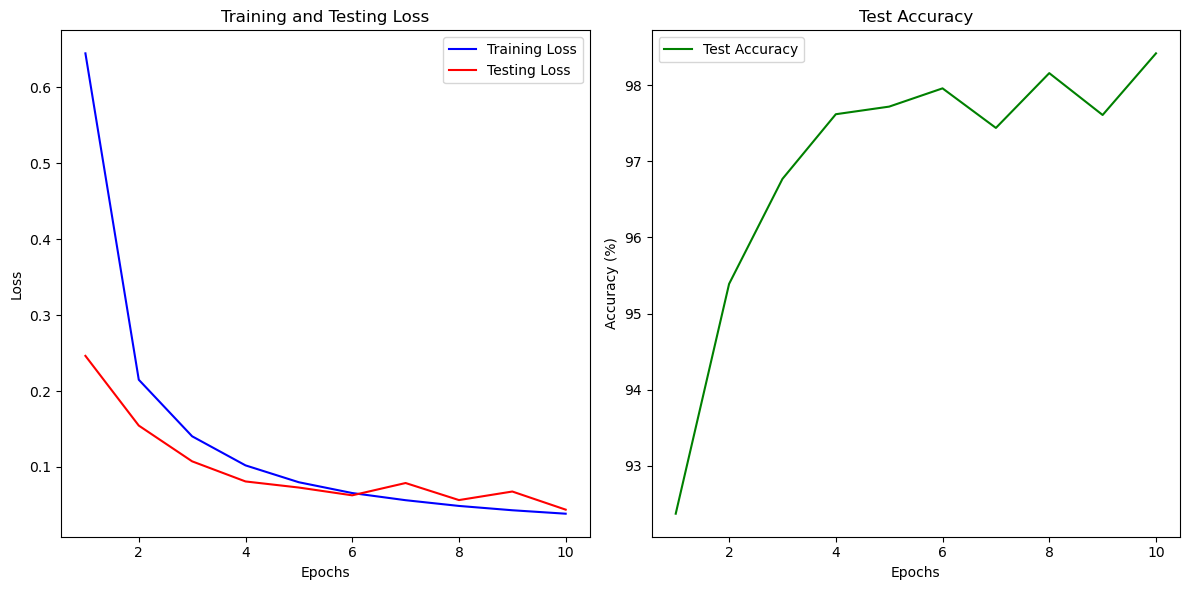

In [ ]:
epochs = range(1, len(train_losses) + 1)

# Plot training and testing loss as a function of the epoch
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b-', label='Training Loss')
plt.plot(epochs, test_losses, 'r-', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot test accuracy as a function of the epoch
plt.subplot(1, 2, 2)
plt.plot(epochs, test_accuracies, 'g-', label='Test Accuracy')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

P10

In [1]:
def solve_for_m(P, k):
    # Placeholder for solving for m given P and k
    # This requires a numerical method or iterative approach to find m that satisfies Params(k, m) ≈ P
    # For demonstration purposes, let's assume a simple approximation
    m = round((-794 - k + math.sqrt( (794+k)**2 - 4 * (k-1) * ( -P + 10) ) ) / (2 * (k-1)))  # P= （794+k）* m + （k-1）* m^2 + 10
    return m

epoch [1/10], Train Loss:0.0306
Test Loss:0.0078
epoch [2/10], Train Loss:0.0306
Test Loss:0.0078
epoch [3/10], Train Loss:0.0306
Test Loss:0.0078
epoch [4/10], Train Loss:0.0306
Test Loss:0.0078
epoch [5/10], Train Loss:0.0306
Test Loss:0.0078
epoch [6/10], Train Loss:0.0306
Test Loss:0.0078
epoch [7/10], Train Loss:0.0306
Test Loss:0.0078
epoch [8/10], Train Loss:0.0306
Test Loss:0.0078
epoch [9/10], Train Loss:0.0188
Test Loss:0.0032
epoch [10/10], Train Loss:0.0123
Test Loss:0.0032
epoch [1/10], Train Loss:0.0130
Test Loss:0.0016
epoch [2/10], Train Loss:0.0057
Test Loss:0.0014
epoch [3/10], Train Loss:0.0054
Test Loss:0.0014
epoch [4/10], Train Loss:0.0052
Test Loss:0.0014
epoch [5/10], Train Loss:0.0052
Test Loss:0.0013
epoch [6/10], Train Loss:0.0052
Test Loss:0.0013
epoch [7/10], Train Loss:0.0052
Test Loss:0.0013
epoch [8/10], Train Loss:0.0051
Test Loss:0.0013
epoch [9/10], Train Loss:0.0051
Test Loss:0.0013
epoch [10/10], Train Loss:0.0051
Test Loss:0.0013
epoch [1/10], Trai

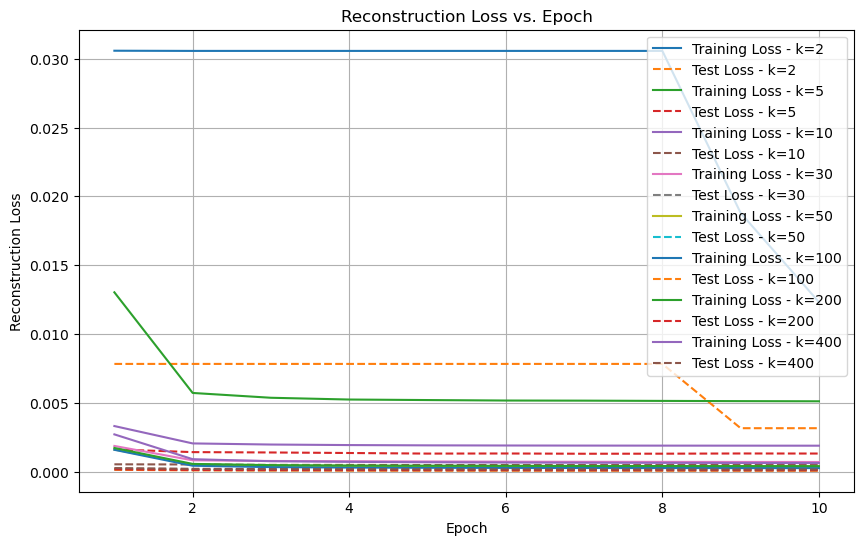

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
import math

class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size_encoder, encoding_dim, hidden_size_decoder):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size_encoder),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size_encoder, encoding_dim),
            nn.LeakyReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, hidden_size_decoder),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size_decoder, input_size),
            nn.Tanh()  # Or Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# Initialization with random biases
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight, nonlinearity='leaky_relu')
        nn.init.normal_(m.bias, std=0.01)  # Initialize biases with small random values

def reset_weights(m):
    if isinstance(m, nn.Linear):
        m.reset_parameters()

def train_autoencoder(model, train_loader, test_loader, criterion, optimizer, num_epochs, device, P, k):
    model.train()
    train_loss, test_loss = [], []

    for epoch in range(num_epochs):
        total_loss = 0
        for data in train_loader:
            imgs, _ = data
            imgs = imgs.view(imgs.size(0), -1).to(device)
            imgs = Variable(imgs)

            # Forward pass
            outputs = model(imgs)
            loss = criterion(outputs, imgs)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        # Calculate average losses
        average_train_loss = total_loss / len(train_loader.dataset)
        train_loss.append(average_train_loss)
        print('epoch [{}/{}], Train Loss:{:.4f}'.format(epoch + 1, num_epochs, average_train_loss))

        # Evaluate on test data
        model.eval()
        with torch.no_grad():
            total = 0
            for data in test_loader:
                imgs, _ = data
                imgs = imgs.view(imgs.size(0), -1).to(device)
                outputs = model(imgs)
                loss = criterion(outputs, imgs)
                total += loss.item()
            average_test_loss = total / len(test_loader.dataset)
            test_loss.append(average_test_loss)
        print('Test Loss:{:.4f}'.format(average_test_loss))
    return train_loss, test_loss


# MNIST dataset loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

# Parameters
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_epochs = 10
k_values = [2, 5, 10, 30, 50, 100, 200, 400]
P = 1000000  # Total num of parameters

# Train and plot for each k
all_train_loss, all_test_loss = [], []

for k in k_values:
    # Parameter split
    encoder_params = P / 2
    decoder_params = P / 2

    # Calculate hidden sizes
    hidden_size_encoder = round((-794 - k + math.sqrt( (794+k)**2 - 4 * (k-1) * ( -encoder_params + 10) ) ) / (2 * (k-1)))
    hidden_size_decoder = round((-2 * k - 784 + math.sqrt((2 * k + 784)**2 - 4 * (-decoder_params + 784 * k + 10))) / 2) # Adjust based on your decoder structure

    # Model, loss, optimizer
    model = Autoencoder(784, hidden_size_encoder, k, hidden_size_decoder).to(device)
    model.apply(init_weights)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    # Training
    train_loss, test_loss = train_autoencoder(model, train_loader, test_loader, criterion, optimizer, num_epochs, device, P, k)

    # Append results
    all_train_loss.append(train_loss)
    all_test_loss.append(test_loss)

# Plot all results
plt.figure(figsize=(10, 6))
for i, k in enumerate(k_values):
    plt.plot(range(1, num_epochs+1), all_train_loss[i], label=f'Training Loss - k={k}')
    plt.plot(range(1, num_epochs+1), all_test_loss[i], '--', label=f'Test Loss - k={k}')

plt.title('Reconstruction Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Reconstruction Loss')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size_encoder, encoding_dim, hidden_size_decoder):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size_encoder),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size_encoder, encoding_dim),
            nn.LeakyReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, hidden_size_decoder),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size_decoder, input_size),
            nn.Tanh()  # Or Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    def get_encoder(self):
        return self.encoder 


# Initialization with random biases
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight, nonlinearity='leaky_relu')
        nn.init.normal_(m.bias, std=0.01)  # Initialize biases with small random values

def reset_weights(m):
    if isinstance(m, nn.Linear):
        m.reset_parameters()

def train_autoencoder(model, train_loader, test_loader, criterion, optimizer, num_epochs, device, P, k):
    model.train()
    train_loss, test_loss = [], []

    for epoch in range(num_epochs):
        total_loss = 0
        for data in train_loader:
            imgs, _ = data
            imgs = imgs.view(imgs.size(0), -1).to(device)
            imgs = Variable(imgs)

            # Forward pass
            outputs = model(imgs)
            loss = criterion(outputs, imgs)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        # Calculate average losses
        average_train_loss = total_loss / len(train_loader.dataset)
        train_loss.append(average_train_loss)
        print('epoch [{}/{}], Train Loss:{:.4f}'.format(epoch + 1, num_epochs, average_train_loss))

        # Evaluate on test data
        model.eval()
        with torch.no_grad():
            total = 0
            for data in test_loader:
                imgs, _ = data
                imgs = imgs.view(imgs.size(0), -1).to(device)
                outputs = model(imgs)
                loss = criterion(outputs, imgs)
                total += loss.item()
            average_test_loss = total / len(test_loader.dataset)
            test_loss.append(average_test_loss)
        print('Test Loss:{:.4f}'.format(average_test_loss))
    return train_loss, test_loss


# MNIST dataset loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

# Parameters
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_epochs = 10
k= 200
P = 1000000  # Total num of parameters

# Train and plot for each k
all_train_loss, all_test_loss = [], []


encoder_params = P / 2
decoder_params = P / 2

    # Calculate hidden sizes
hidden_size_encoder = round((-794 - k + math.sqrt( (794+k)**2 - 4 * (k-1) * ( -encoder_params + 10) ) ) / (2 * (k-1)))
hidden_size_decoder = round((-2 * k - 784 + math.sqrt((2 * k + 784)**2 - 4 * (-decoder_params + 784 * k + 10))) / 2) # Adjust based on your decoder structure

    # Model, loss, optimizer
model = Autoencoder(784, hidden_size_encoder, k, hidden_size_decoder).to(device)
model.apply(init_weights)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

    # Training
train_loss, test_loss = train_autoencoder(model, train_loader, test_loader, criterion, optimizer, num_epochs, device, P, k)

    # Append results
all_train_loss.append(train_loss)
all_test_loss.append(test_loss)


epoch [1/10], Train Loss:0.0017
Test Loss:0.0002
epoch [2/10], Train Loss:0.0006
Test Loss:0.0001
epoch [3/10], Train Loss:0.0005
Test Loss:0.0001
epoch [4/10], Train Loss:0.0004
Test Loss:0.0001
epoch [5/10], Train Loss:0.0004
Test Loss:0.0001
epoch [6/10], Train Loss:0.0004
Test Loss:0.0001
epoch [7/10], Train Loss:0.0004
Test Loss:0.0001
epoch [8/10], Train Loss:0.0004
Test Loss:0.0001
epoch [9/10], Train Loss:0.0004
Test Loss:0.0001
epoch [10/10], Train Loss:0.0004
Test Loss:0.0001


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

class EncoderClassifier(nn.Module):
    def __init__(self, encoder, num_classes=10):
        super(EncoderClassifier, self).__init__()
        self.encoder = encoder
        # Freeze the encoder
        for param in self.encoder.parameters():
            param.requires_grad = False
        
        # Add a new classifier layer
        self.classifier = nn.Linear(k, num_classes)    # encoder.output_dim should match the encoder's output size
        
    def forward(self, x):
        x = self.encoder(x)
        print("Shape of x after encoder:", x.shape)
        x = self.classifier(x)
        return torch.log_softmax(x, dim=1)  # Using log_softmax for a numerically stable output

# Assuming encoder_model is your trained encoder from Problem 10
encoder_model = Autoencoder(784, hidden_size_encoder, k, hidden_size_decoder).get_encoder()

# Initialize the classifier model with the encoder and the output dimension of the encoder
model = EncoderClassifier(encoder_model, num_classes=10)
model.to(device)


# Continue with data loaders, loss, optimizer setup
# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Loss and optimizer
criterion = nn.NLLLoss()  # Since we are using log_softmax as the final layer
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-3)  # Only optimize the classifier parameters


In [31]:
# Training Loop
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for data, targets in train_loader:
            data = data.view(data.size(0), -1).to(device)  # Flatten the images
            targets = targets.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, targets)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader)}")

# Testing Loop
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, targets in test_loader:
            data = data.view(data.size(0), -1).to(device)  # Flatten the images
            targets = targets.to(device)

            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    print(f"Accuracy of the model on the test images: {100 * correct / total} %")

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming model, train_loader, test_loader, criterion, optimizer are already defined
model.to(device)

# Training the model
train_model(model, train_loader, criterion, optimizer, num_epochs=10)

# Testing the model
test_model(model, test_loader)


Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64, 200])
Shape of x after encoder: torch.Size([64